<a href="https://colab.research.google.com/github/EDANHS/ADA-informes/blob/main/Informe6-Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $Algoritmo$ $Select$

---
Encontrar el k-ésimo dato de un arreglo se ha tratado con diferentes algoritmos, puesto que todos son una variación del QuickSort se diferencian en el metodo para encontrar el pivote. Entre las elecciones de pivote tenemos:

* Escoger un pivote aleatorio.
* Escoger como pivote la mediana.

---

## 1. Descripción del problema.
---
El problema por tratar a continuación corresponde a seleccionar el k-ésimo elemento de un arreglo (ya sea el k-ésimo elemento menor o mayor), esto se puede realizar sin ordenar una lista de entrada siguiendo la idea del pivote de QuickSort.

$Entrada:$ arreglo $A$ de $n$ elementos con un indice $k$ que representa la posición a buscar.

$Salida:$ Elemento $X$ perteneciente a $A$, donde si $A$ estuviera ordenado, se encontraria en la posición $k$.

**$X$ se denomina como estadístico de orden k-ésimo**

---

## 2. Descripción del algoritmo $Select$
---

El funcionamiento del algoritmo $Select$ se puede dividir en dos partes importantes. La primera parte consiste en la elección del elemento de partición (escoger la mediana del arreglo). Para un arreglo $A$ de $n$ elementos:

---
####$Pivot-Selection:$
* Divide el arreglo en particiones de [n/5], donde los grupos tienen 5 elementos como máximo, el último grupo puede tener a los más 5 elementos.

* Ordena los grupos mediante un algoritmo de ordenamiento, en este caso InsertionSort.

* De cada grupo se selecciona la mediana y se guarda en un arreglo auxiliar de medianas.

* Se vuelve a llamar recursivamente a $Pivot-Selection$ hasta que quede un solo elemento, el cual representa al elemento pivote, este se debe retornar a la función Select.

---

####$Select:$

* Según lo retornado por $Pivot-Selection$ generamos la partición del arreglo de entrada.

* Antes que nada, debemos confirmar si el elemento que esta en la posición de pivote corresponde al k-ésimo elemento buscado. Si lo es, se retorna directamente nuestro elemento.

* En caso de que no corresponda a nuestro elemento, se debe confirmar si la posición al pivote es menor al k-ésimo valor buscado, si lo es llamamos a la función Select y le damos como parametro el arreglo $A[low...pivot]$, en caso contrario, a Select se le envia $A[pivot+1...high]$. 

## 3. Código



In [634]:
from termcolor import colored

In [635]:
def InsertionSort(a):
    n = len(a)
    for i in range(1,n):
      key = a[i]
      for j in range(i-1,-1,-1):
        if a[j]<key:
          a[j+1] = key
          break
        a[j+1] = a[j]
      if key < a[0] : a[0] = key

In [649]:
def mediana(A,Verbose = False):
  InsertionSort(A)
  n = len(A)
  if Verbose == True:
    print("---------------")
    print("Calculando la mediana: ",colored(A,'red'))
    print("---------------",end='\n\n')
  
  return A[n//2]

In [637]:
def Partition (A, piv):
  min = 0
  max = len(A)-1
  i = 0
  pivIndex = -1
  for k in range (0, len(A)):
    if (A[k] <= piv):
      A[i], A[k] = A[k], A[i]
      i += 1
      if (A[i-1] == piv):
        pivIndex = i-1

  A[i-1], A[pivIndex] = A[pivIndex], A[i-1]
  return i-1

In [638]:
def PivotSelection(A,Verbose = False):
    
    n = len(A)
    median = []
    j = 0
    while j < n//5:
      median.append(mediana(A[j:j+5],Verbose))
      j+=5

    if j <= n//5:
      median.append(mediana(A[j:],Verbose))

    if Verbose == True:
      print("---------------")
      print("Arreglo de medianas: ",median)
      print("---------------",end='\n\n')
    #Si la lista de medinas tiene menos de 5 elementos entra a caso base
    if len(median) <= 5:
        pivot = mediana(median,Verbose)
    #Recursividad
    else:
        pivot = PivotSelection(median,Verbose)

    if Verbose == True:
      print("---------------")
      print("Mediana Verdadera (Pivote): ",pivot)
      print("---------------",end='\n\n')
    return pivot


In [639]:
def Select(A, i, Verbose = False):
    if Verbose == True:
      print("---------------")
      print("Arreglo entrada: ",colored(A,'green'))
      print("---------------",end='\n\n')
    pivot = PivotSelection(A,Verbose)
    
    n = Partition(A,pivot)
    low = A[:n]
    high = A[n+1:]

    k = len(low)
    if i < k:
        return Select(low,i,Verbose)
    elif i > k:
        return Select(high,i-k-1,Verbose)
    
    
    return pivot

In [650]:
arr = [12, 3, 5, 7, 4, 19, 26]
a = Select(arr,2,False)
print("Valor minimo:",a)

Valor minimo: 5


##Ejemplo con Verbose == True



A continuación, se mostrará el paso a paso que realizá el programa.

In [641]:
x = Select([4, 5,8, 9, 1, 0],2,True)
print("i-ésimo del arreglo: ",3)
print("Valor retornado: ",x)

---------------
Arreglo entrada:  [4, 5, 8, 9, 1, 0]
---------------

---------------
Calculando la mediana:  [1, 4, 5, 8, 9]
---------------

---------------
Arreglo de medianas:  [5]
---------------

---------------
Mediana Verdadera (Pivote):  5
---------------

---------------
Arreglo entrada:  [4, 0, 1]
---------------

---------------
Arreglo de medianas:  [1]
---------------

---------------
Mediana Verdadera (Pivote):  1
---------------

---------------
Arreglo entrada:  [4]
---------------

---------------
Arreglo de medianas:  [4]
---------------

---------------
Mediana Verdadera (Pivote):  4
---------------

i-ésimo del arreglo:  3
Valor retornado:  4


##Ejemplo paso a paso 

Para el arreglo de 5 datos definido como: A = $[9,3,2,5,69]$, se busca el valor minímo del arreglo (1 primer elemento).

1ra iteración:

      A = [9,3,2,5,69]
      pivote = 5 : posicion 3
      ¿posición == 1 elemento?
      Particion1 : [3,2]
      Particion2 : [9,69]

2da iteración:

      A = [3,2]
      pivote = 2 : posicion 1
      ¿posición == 1 elemento? Si

      retorno : 2
      

#4. Prueba de correctitud


###4.1 Función Partition

### Teorema (correctitud de Partition).

*Para un arreglo A[p...r] de n elementos, donde p es el tramo inicial del arreglo y r el final de este.* *El algoritmo Partition retorna un recibe un arreglo A[p..r], lo reorganiza y retorna un índice q de tal forma que los elementos del arreglo A[p..q-1] son menores o iguales a A[q] y los elementos del arreglo A[q+1..r] son mayores a A[q].*

### Lema (**propiedad invariante de bucle)**

Al comienzo de cada iteración, en un arreglo A[p...r], se cumple que para cualquier índice k:

* **1. Si p≤k≤i, entonces A[k]≤A[r].** 
 *Si un elemento en la posición k, es menor o igual al i-ésimo elemento que se encuentra en el arreglo y mayor o igual al primer elemento, entonces A[k] será menor o igual al pivote A[r]*

* **2.Si i<k<j, entonces A[k]>A[r].** *En caso de que k este entre el i-ésimo elemento y r, significa que el elemento A[k] es mayor al pivote*

Antes de cada entrar en el bucle, sabemos que "Partition" **siempre** elegirá un pivote que sea igual al último elemento del arreglo (pivot = A[r]), además de tener dos índices, que llamaremos j e i, donde j = p e i = p -1.

---


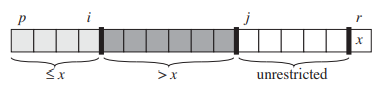

Image 7.2 - Introduction-To-Algorithms - Page N°173


---

**Inicialización**: teniendo en cuenta nuestro pivote, y los índices j e i, sabemos que antes de entrar en el bucle, se cumple trivialmente lo propuesto en el Lema, para un elemento k entre el inicio e i, será menor o igual al pivote, y si va desde i hasta r, es mayor al pivote, por lo que, en un inicio significaría que al no haber elementos entre j e i, podemos decir que todos los elementos del arreglo se consideran mayores al pivote hasta que se demuestre lo contrario.

**Mantención**: Una vez empezamos a iterar con j como índice principal, al ir incrementando, si se comprueba que A[j] es menor o igual al pivote, se producirá un intercambio entre A[i] y A[j], y se incrementará $i$, por lo cual, se cumplirá la segunda condición del lema, para elementos A[i..j-1] se generará una zona donde se ubicaran los elementos mayores al pivote, lo que prueba el primer lema, puesto que automáticamente se irá separando por medio de la iteración y comprobación las zonas mayores y menores con respecto al pivote.

*El bucle finaliza cuando j es igual a r - 1, al llegar a este punto, sabemos que el arreglo se separa en dos partes con respecto al elemento r, una menor o igual y otra mayor, solo queda intercambiar el elemento i + 1 con el r, finalmente, se retorna el índice i + 1, esto con el objetivo de dividir el arreglo en futuras llamadas recursivas y poder ordenar el arreglo.*

###4.2 Función Pivot-Selection

### Teorema (correctitud de Pivot-Selection).

*Teorema: La función Pivot-Selection retorna la mediana de las medianas de un conjunto de elementos, el cual será usado como pivote*

---

El procedimiento para escoger un buen pivote (la mediana de las medianas) consiste en ir dividiendo el arreglo de entrada en sub-arreglo de tamaño 5 cada uno, con excepción del último, puesto que, este puede tener a los más 5 elementos, luego las ordena con InsertionSort, el cual tiene un costo lineal, puesto que siempre serán 5 elementos.

Para comprobar la correctitud del Pivot-Selection, debemos asumir que InsertionSort ordena correctamente el arreglo pasado, por inducción podemos establecer que para un arreglo de entrada $A$ de $n$ elementos:

**Caso base P(1)**: Si el arreglo tiene menos de 5 elementos, entonces se ordena y se retorna la mediana que es el elemento central en caso de ser tamaño impar [((n+1)/2)], si no lo es, se retorna el dato ubicado en el punto (n/2) del arreglo.

Para P(m) sub-arreglos siendo que m es igual a n/5, se deben ordenar todos los sub-arreglo, luego extraerles la mediana e ir guardando este valor en un arreglo de medianas, este arreglo se vuelve a pasar a la misma función Pivot-Selection. Finalmente, solo basta hacer este pasó de manera recursiva hasta tener un arreglo equivalente al caso base. Este retornará la mediana verdadera del arreglo.

Este método permite estabilidad al algoritmo, puesto que a diferencia de Randomized-Select, no ocupamos un valor dejado a la suerte.


###4.3 Función Select

### Teorema (correctitud de Select).

*Teorema: La función Pivot-Selection retorna el k-ésimo estadistico de orden en el arreglo de entrada.*

---

Siendo comprobados Partition y Pivot-Selection podemos establecer la correctitud del algoritmo Select. Por inducción mátematica podemos decir que para un arreglo $A$ de tamaño $n$ :


Consideremos un caso base de $P(1)$ cuando solo hay un elemento en nuestro subarreglo, en ese caso nuestro i-ésimo elemento más pequeño corresponderá al unico elemento presente.

Cuando obtenemos el pivote y lo comparamos con nuestro i-ésimo elemento a buscar, en caso de que no corresponda se particiona el arreglo. Si el i-esimo elemento es menor al pivote se continua por el subarreglo de la izquierda, si el i-ésimo elemento es mayor al pivote se continua por la derecha. Con esto se minimiza el tamaño de cada subarreglo $m$ con cada llamada recursiva, cumpliendo la condición de P(m) es verdad para m < n

Con lo anteriormente comprobado, podemos concluir que la correctitud para el algoritmo Select es correcta.

#5. Tiempo de ejecución

$Lema:$ el tiempo de ejecución del algoritmo Select es de complejidad $O(n)$. 

Iremos analizando paso a paso el recorrido que realiza el algoritmo para establecer una relación de recurrencia:

* Primero el algoritmo Pivot-Selection busca la mediana de las medianas, sabiendo cómo funciona esto podemos decir que está definida como $T(n/5)$.

* El algoritmo Partition tiene una complejidad de tiempo $O(n)$.

Para determinar la función recursiva que se genera en Select al separar el arreglo en dos casos, si no se ha encontrado el k-ésimo dato al finalizar Partition debemos saber que:

* Al menos la mitad de las medianas que se encontraron en Pivot-Selection son mayores o igual que la mediana verdadera obtenida al finalizar este algoritmo. Esto nos dice que como mínimo la mitad de los grupos de medianas aportan 3 datos mayores que la mediana verdadera, con excepción del último grupo, ya que este tiene a lo más 5 elementos. A partir de lo anterior surge la siguiente proporción.

      [1/2 * n/5]*3 => 3n/10


* Dado que al menos tres elementos son mayores que la mediana verdadera, nos indica que la función se repite a lo más 7n/10 veces.

      n - 3n/10 => 7n/10


Con esto claro podemos establecer que la relación de recurrencia para el algoritmo completo es:

    T(n) = T(n/5) + T(7n/10) + O(n)

Para probar que el tiempo de ejecución es $O(n)$ se debe aplicar sustitución, puesto que cualquier otro método sería inconveniente o no resultaría.

    T(n) <= cn/5 + 7cn/10 + dn

    T(n) <= 9cn/10 + dn => O(n)

En conclusión, el algoritmo Select tiene complejidad temporal $O(n)$, también se puede apreciar que tiene constantes muy grandes, debido al proceso de escoger la mediana verdadera y las particiones que realiza.



    

#6. Experimentos

In [642]:
import matplotlib.pyplot as plt
from random import randint
from random import choice
from random import sample
import datetime
from timeit import repeat


In [643]:


def R_Select (A, i):
  #Encontrar un pivote.

  #Reorganizar el arreglo con Partition y obtener la posición del pivote.
  pivIndex = Partition(A, choice(A))

  #Verificar si el pivote es el estadístico de orden buscado.
  if (pivIndex == i-1):
    return A[pivIndex]
  if (i-1 < pivIndex):
    return Select(A[0:pivIndex], i)
  if (i-1 > pivIndex):
    return Select(A[pivIndex+1:len(A)], i-pivIndex-1)

  #Retornar el estadístico de orden.
  return A

In [647]:
x=[]; y=[]
x1=[]; y1=[]

for n in range(5,500):
  a = sample(range(0, 500), n)
  i = randint(0, len(a)-1)
  #La función repeat ejecuta 20 veces los algoritmos de selección con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import R_Select", stmt=f"R_Select({a},{i})", repeat=1, number=10)
  t1 = repeat(setup="from __main__ import Select", stmt=f"Select({a}, {i})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  y1.append(t1)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Select"])

plt.xlabel('Cantidad de Elementos en el Arreglo')
plt.ylabel('Tiempo en Milisegundos')
plt.show()

IndexError: ignored